In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
data = pd.read_csv('../data/processed/processed_data.csv')


Доли постов каждой категории: y
1    0.545019
0    0.454981
Name: proportion, dtype: float64


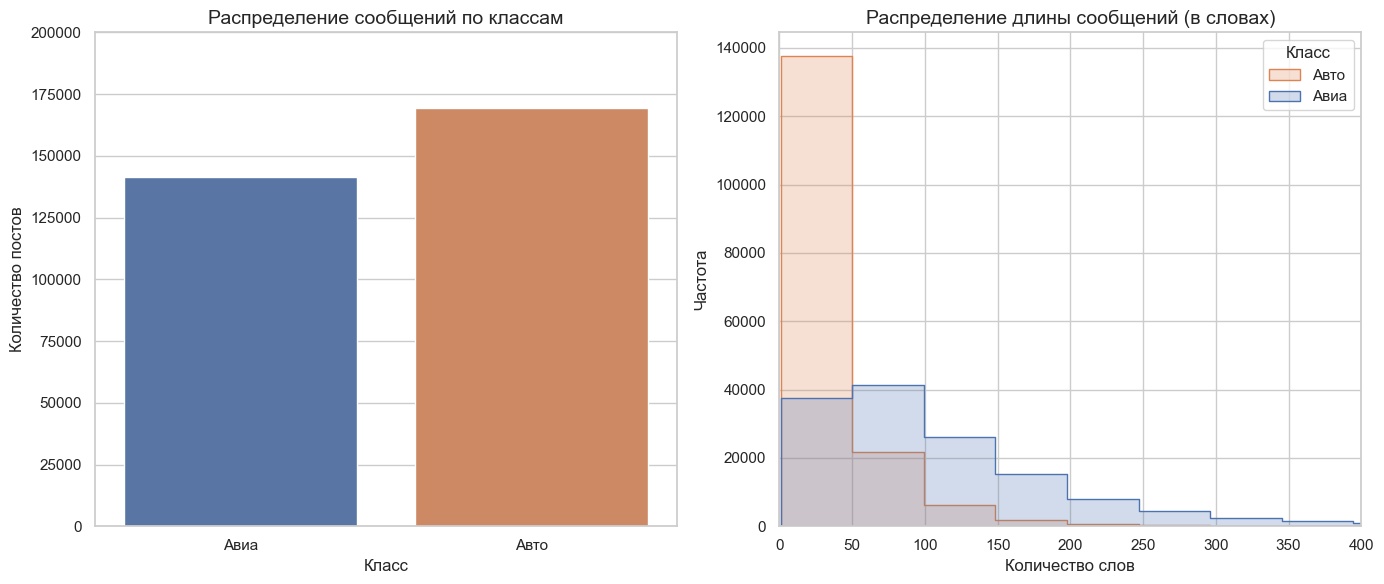

In [7]:
print(f'\nДоли постов каждой категории: {data['y'].value_counts(normalize=True)}')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='y', data=data, hue='y', legend=False)
plt.ylim(top=200000)
plt.title('Распределение сообщений по классам', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество постов', fontsize=12)
plt.xticks([0, 1], ['Авиа', 'Авто'])

data['word_count'] = data['processed_text'].apply(lambda x: len(str(x).split()))

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='word_count', hue='y', bins=34, element="step")
plt.xlim((0, 400))
plt.title('Распределение длины сообщений (в словах)', fontsize=14)
plt.xlabel('Количество слов', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(title='Класс', labels=['Авто', 'Авиа'])

plt.tight_layout()
plt.show()

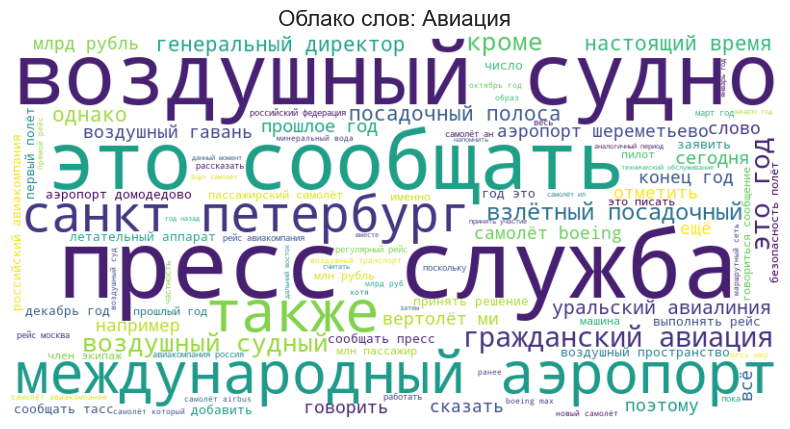

{'пресс служба': 1.0, 'воздушный судно': 0.8480445763682758, 'это сообщать': 0.7520179138676248, 'международный аэропорт': 0.6980159350101547, 'также': 0.6872363693172941, 'санкт петербург': 0.6092277248346613, 'гражданский авиация': 0.594021767432172, 'это год': 0.5727750872259543, 'воздушный судный': 0.4993490600427017, 'кроме': 0.48940269749518306, 'взлётный посадочный': 0.4858095089308962, 'генеральный директор': 0.48539290735822527, 'настоящий время': 0.4795084101442483, 'однако': 0.4646149039212623, 'посадочный полоса': 0.4445138780398896, 'уральский авиалиния': 0.3946779149091288, 'сегодня': 0.37353538509607875, 'прошлое год': 0.37348330989949485, 'сказать': 0.34978909545383535, 'отметить': 0.34900796750507734, 'аэропорт шереметьево': 0.34635213247930013, 'самолёт boeing': 0.34182159037650367, 'млрд рубль': 0.3402072592824038, 'воздушный гавань': 0.335416341196688, 'всё': 0.3341144612820913, 'вертолёт ми': 0.3312503254699786, 'конец год': 0.3278654376920273, 'поэтому': 0.3198979

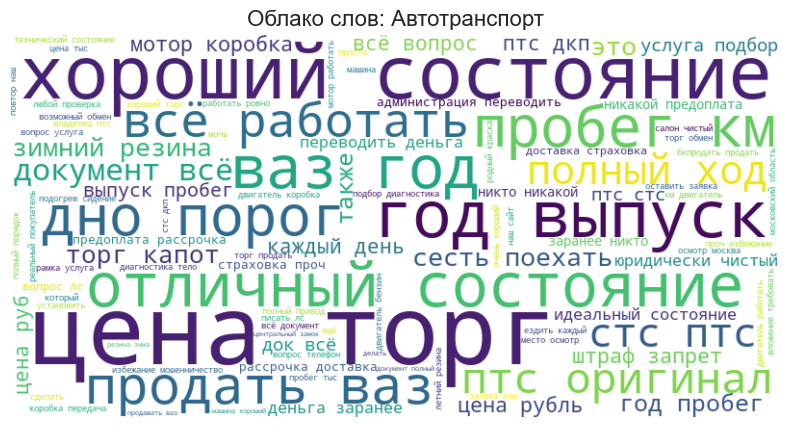

{'цена торг': 1.0, 'хороший состояние': 0.9857583076538686, 'год выпуск': 0.7668859831764804, 'отличный состояние': 0.6625301907220787, 'ваз год': 0.6440409760972766, 'пробег км': 0.5745814941284251, 'дно порог': 0.5640043308070293, 'продать ваз': 0.5273590405596735, 'всё работать': 0.5228616640293162, 'птс оригинал': 0.5165320229865912, 'полный ход': 0.4572332805863246, 'стс птс': 0.44832181227617224, 'документ всё': 0.44290830348963106, 'зимний резина': 0.4308320146581161, 'это': 0.42974931290080787, 'сесть поехать': 0.41692346131423336, 'торг капот': 0.393520446406263, 'год пробег': 0.3635379362038811, 'также': 0.3515449321229283, 'мотор коробка': 0.3413841925543433, 'цена рубль': 0.33955192804197554, 'штраф запрет': 0.3273090697093362, 'всё вопрос': 0.30540518031148495, 'птс дкп': 0.3032397767968685, 'цена руб': 0.29357874573165654, 'каждый день': 0.28966436245523447, 'выпуск пробег': 0.2895810777046723, 'док всё': 0.27259098858998915, 'услуга подбор': 0.2681768968101941, 'птс стс'

In [8]:
def plot_wordcloud(text_data, title):
    all_text = ' '.join([str(t) for t in text_data])
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        random_state=42
    ).generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

    print(wordcloud.words_)


plot_wordcloud(data[data['y'] == 0]['processed_text'], 'Облако слов: Авиация')

plot_wordcloud(data[data['y'] == 1]['processed_text'], 'Облако слов: Автотранспорт')